In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [2]:
%matplotlib inline

cur_dir = os.path.dirname('__file__')

train = pd.read_csv(os.path.join(cur_dir, "data", "train.csv"))
test = pd.read_csv(os.path.join(cur_dir, "data", "test.csv"))

In [3]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
train.PdDistrict.value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

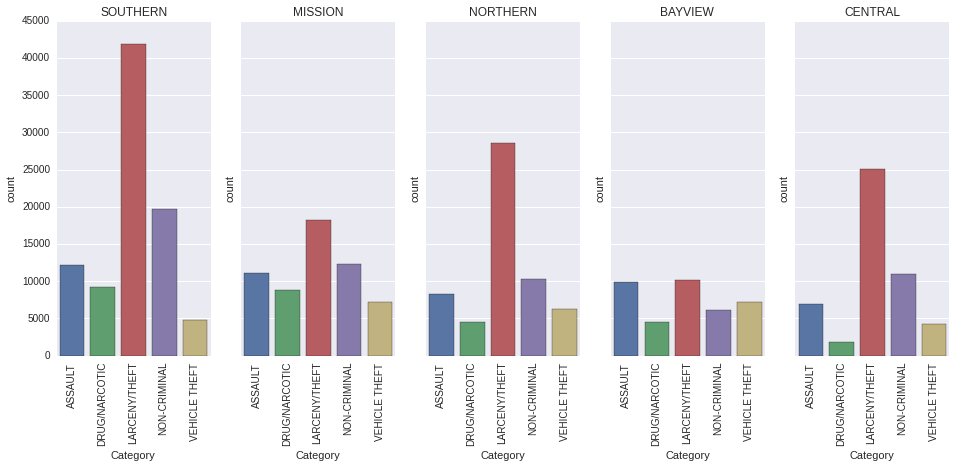

In [5]:
most_common_cats = train.Category[train.Category != "OTHER OFFENSES"].value_counts().index[0:5]
most_common_districts = train.PdDistrict.value_counts().index[0:5]


f, axtuple = plt.subplots(1, len(most_common_cats), sharey=True)

for i in range(len(most_common_districts)):
    
    subset = train[(train.PdDistrict == most_common_districts[i]) & train.Category.isin(most_common_cats)]
    
    ax = sns.countplot(x="Category", data=subset.sort_values("Category"), ax=axtuple[i])
    ax.set_title(most_common_districts[i])
    plt.sca(ax)
    plt.xticks(rotation=90)
    
plt.gcf().set_size_inches(16, 6, forward=True)


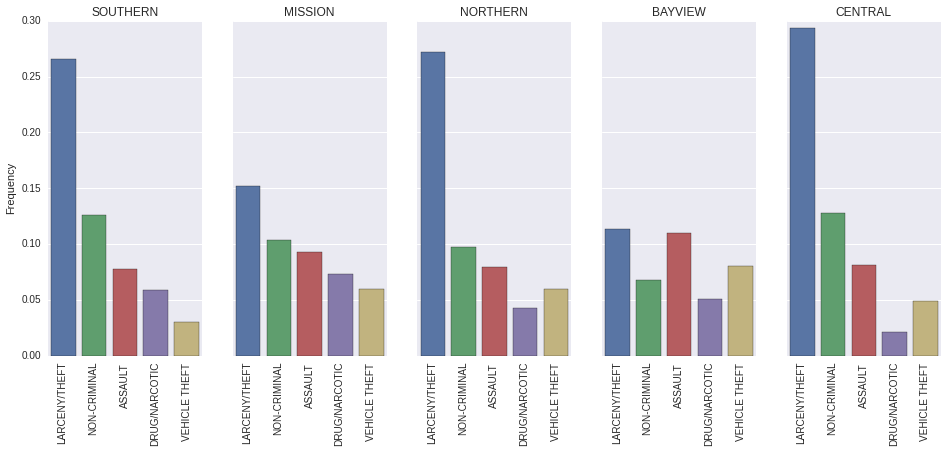

In [6]:
most_common_cats = train.Category[train.Category != "OTHER OFFENSES"].value_counts().index[0:5]
most_common_districts = train.PdDistrict.value_counts().index[0:5]


f, axtuple = plt.subplots(1, len(most_common_cats), sharey=True)

for i in range(len(most_common_districts)):
    
    subset = train[train.PdDistrict == most_common_districts[i]]
    proportions = (subset.Category.value_counts().astype(float) / len(subset)).loc[most_common_cats]
    
    
    
    ax = sns.barplot(x=proportions.index, y=proportions, ax=axtuple[i])
    ax.set_title(most_common_districts[i])
    ax.set_ylabel("")
    plt.sca(ax)
    plt.xticks(rotation=90)
    
axtuple[0].set_ylabel("Frequency")
plt.gcf().set_size_inches(16, 6, forward=True)
